In [59]:
import pandas as pd

df = pd.read_csv("physics_and_chemistry_nobel_laureate.csv")

In [60]:
df.head()

,year,name,country,category,biography
0,1901,Wilhelm Röntgen,German Empire,Physics,Wilhelm Conrad Röntgen (; German pronunciation...
1,1902,Hendrik Lorentz,Netherlands,Physics,Hendrik Antoon Lorentz (; 18 July 1853 – 4 Feb...
2,1902,Pieter Zeeman,Netherlands,Physics,Pieter Zeeman (Dutch: [ˈzeːmɑn]; 25 May 1865 –...
3,1903,Henri Becquerel,France,Physics,Antoine Henri Becquerel (; French pronunciatio...
4,1903,Pierre Curie,France,Physics,"Pierre Curie ( KURE-ee, French: [pjɛʁ kyʁi]; 1..."


In [61]:
df.drop(["year", "name", "country"], axis=1, inplace=True)

Sentences

Min/max/avg number of sentences per category together with the corresponding histograms and box plots

In [62]:
import spacy

nlp = spacy.load("en_core_web_sm")

In [63]:
def n_sentences(row):
  doc = nlp(row)
  sents = [sent for sent in doc.sents]
  length_bio = len(sents)
  return length_bio


In [64]:
df["n_sentences"] = df["biography"].apply(n_sentences)

In [65]:
df["n_sentences"]

0       82
1      157
2       56
3       83
4       79
      ... 
195     57
196     43
197     92
198     28
199     23
Name: n_sentences, Length: 200, dtype: int64

In [66]:
sum_lengths = df.groupby("category").sum("n_sentences")
sum_lengths

,n_sentences
category,
Chemistry,7627
Physics,13458


In [67]:
mean_len = df.groupby("category").mean("n_sentences")
mean_len

,n_sentences
category,
Chemistry,76.27
Physics,134.58


In [68]:
max_len = df.groupby("category").max("n_sentences")
max_len

,n_sentences
category,
Chemistry,485
Physics,772


In [69]:
min_len = df.groupby("category").min("n_sentences")
min_len

,n_sentences
category,
Chemistry,16
Physics,23


In [70]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

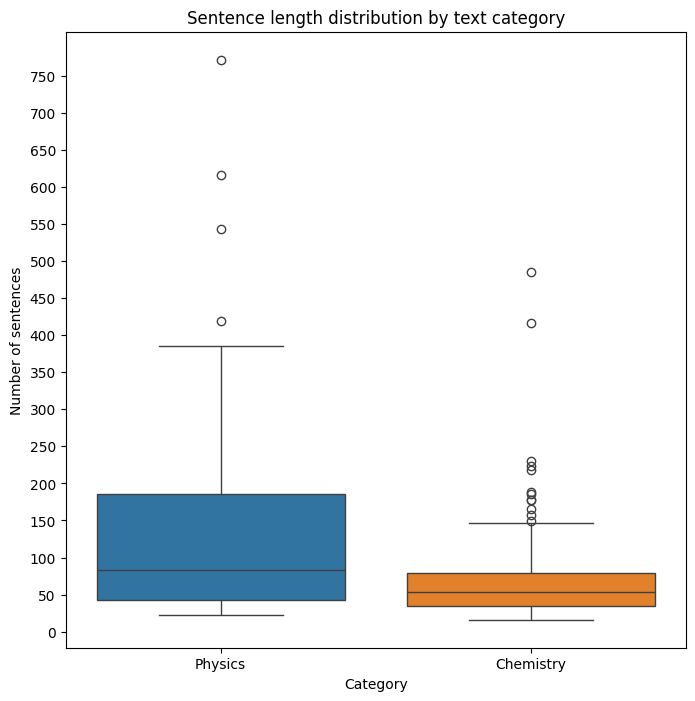

In [71]:
fig, ax = plt.subplots(figsize=(8,8))

ax.set_yticks(np.arange(0, 800, 50))
sns.boxplot(data = df, y = "n_sentences", x = "category", hue="category")

plt.title("Sentence length distribution by text category")
plt.ylabel("Number of sentences")
plt.xlabel("Category")

plt.show()


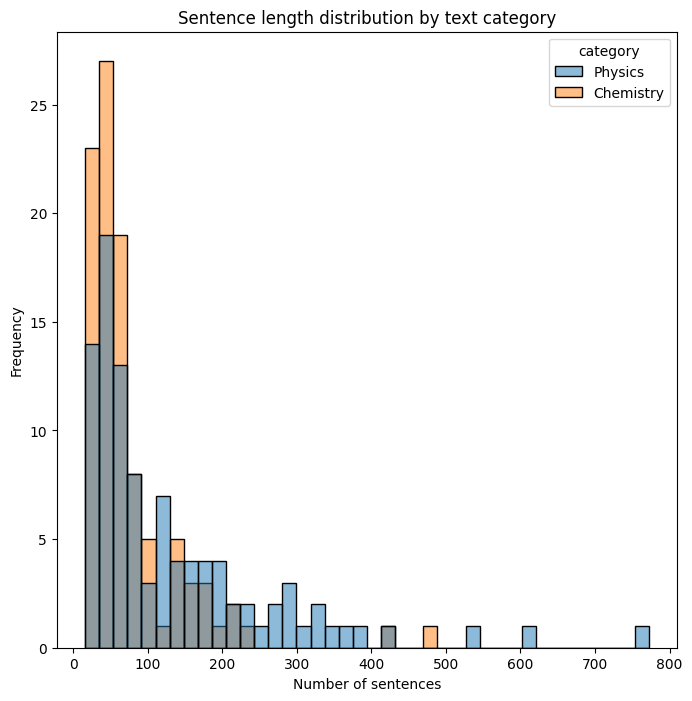

In [86]:
fig, ax = plt.subplots(figsize=(8,8))

# ax.set_xticks(np.arange(0, 800, 50))
sns.histplot(data = df, x="n_sentences", hue="category", bins=40)

plt.title("Sentence length distribution by text category")
plt.xlabel("Number of sentences")
plt.ylabel("Frequency")

plt.show()

Tokens

In [ ]:
def tokenize(row):
  words =